In [1]:
import pandas as pd
import numpy as np
from plotly import express as plx

In [2]:
col_1 = [1,2,3,4,5,6,7,8,9,10,100]
col_2 = ["Red", "Green", "Blue", "Orange","Blue","Green",
         "Blue", "Green", "White", "Blue","Green"]

In [3]:
df = pd.DataFrame()
df

""


In [4]:
df["col-1"], df["col-2"] = col_1, col_2

In [5]:
df

,col-1,col-2
0,1,Red
1,2,Green
2,3,Blue
3,4,Orange
4,5,Blue
5,6,Green
6,7,Blue
7,8,Green
8,9,White
9,10,Blue


# Univariate Analysis - (Non-Graphical way)

## 1. Measure of Center 

### 1.1 Mean (Average)

In [6]:
df["col-1"].mean()

14.090909090909092

### or

In [7]:
np.mean(df["col-1"])

14.090909090909092

### 1.2 Median 

In [8]:
df["col-1"].median()

6.0

In [9]:
np.median(df["col-1"])

6.0

### 1.3 Mode

In [10]:
import statistics

In [11]:
df["col-2"].mode()

0     Blue
1    Green
Name: col-2, dtype: object

## 2. Measure of Dispersion

### 2.1 Variance

In [12]:
np.var(df["col-1"])

745.5371900826445

### 2.2 Standard Deviation

In [13]:
np.std(df["col-1"])

27.304526915561905

### 2.3 Mean Absolute Deviation

### 2.4 Median Absolute Deviation

### 2.5 Range

In [14]:
max(df["col-1"]) - min(df["col-1"])

99

### 2.6 Inter-Quartile Range

In [15]:
IQR = np.percentile(df["col-1"], 75) - np.percentile(df["col-1"], 25)
IQR

5.0

## 3. Frequency Table

In [16]:
pd.DataFrame(df["col-2"].value_counts())

,count
col-2,
Green,4
Blue,4
Red,1
Orange,1
White,1


In [17]:
pd.DataFrame(df["col-1"].value_counts())

,count
col-1,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


## 5. Five Number Summary (minimum, 25th percentile, 50th and 75th Percentile, Maximum),
## data count, non-null count, unique data, frequency 

In [18]:
df["col-1"].describe()

count     11.000000
mean      14.090909
std       28.637229
min        1.000000
25%        3.500000
50%        6.000000
75%        8.500000
max      100.000000
Name: col-1, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col-1   11 non-null     int64 
 1   col-2   11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


In [20]:
df.describe(include="all")

,col-1,col-2
count,11.000000,11
unique,NaN,5
top,NaN,Green
freq,NaN,4
mean,14.090909,NaN
std,28.637229,NaN
min,1.000000,NaN
25%,3.500000,NaN
50%,6.000000,NaN
75%,8.500000,NaN


# Univariate Analysis - (Graphical way)

## 1. Box Plot

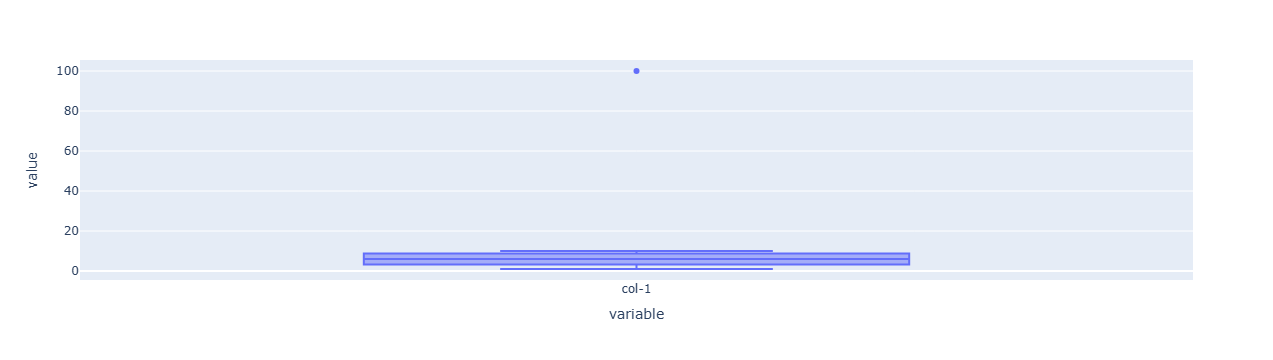

In [21]:
# box plot before handling outliers
plx.box(df["col-1"])

In [22]:
# Manually changing value in a particular column
df.loc[df["col-1"]==100, "col-1"] = 9

#### or

In [23]:
# Label and index based value chaning method
df.at[10, "col-1"] = 8

In [24]:
df

,col-1,col-2
0,1,Red
1,2,Green
2,3,Blue
3,4,Orange
4,5,Blue
5,6,Green
6,7,Blue
7,8,Green
8,9,White
9,10,Blue


In [25]:
# box plot after handling outliers
plx.box(df["col-1"])

## 2. Histogram

In [26]:
plx.histogram(df["col-1"])

## 3. Bar Chart

In [27]:
# Wrong way
plx.bar(df["col-2"])

In [28]:
# Proper way
plx.bar(df["col-2"].value_counts())

## 4.Pie Chart

In [29]:
# Unable to display, wrong way
plx.pie(df["col-2"])

In [30]:
# Proper way
plx.pie(data_frame = df,
       values = pd.DataFrame(df["col-2"].value_counts())["count"], 
       names =list(pd.DataFrame(df["col-2"].value_counts()).index))

## 5. Violin Plot

In [31]:
plx.violin([1,1,2,2,3,4,5,6,7,8,8,9,9,9,10,10,10,10])

### 6. DistPlot

In [32]:
import plotly.figure_factory as ff

fig = ff.create_distplot([[1,2,2,3,3,3,4,4,4,4,4,4,4,4,5,5,5,6,6,7]], ["Distplot"])
fig.show()